# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [12]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [14]:
#  1. Get the total rides for each city type


In [15]:
#Create the city type dataframes
c_types = pyber_data_df.set_index(["type"])
city_type_df=pd.DataFrame(c_types)

In [16]:
#  1. Get the total rides for each city type 


In [17]:
#  1. Get the total rides for each city type 
total_rides = city_type_df.groupby(["type"]).count()["ride_id"]

total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [18]:
# 2. Get the total drivers for each city type
#total_drivers = city_type_df.groupby(["type"]).count()["driver_count"]## did not work
total_drivers = city_type_df.drop_duplicates(["city"]).groupby(["type"]).sum()["driver_count"]

total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [19]:
#  3. Get the total amount of fares for each city type
total_fares = city_type_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [20]:
#  4. Get the average fare per ride for each city type. 
avg_fare_city_type = total_fares / total_rides

avg_fare_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [21]:
# 5. Get the average fare per driver for each city type. 

avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [22]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame(
                {"Total Rides":total_rides,
                  "Total Drivers":total_drivers,
                  "Total Fares":total_fares,
                  "Average Fare per Ride": avg_fare_city_type,
                  "Average Fare per Driver": avg_fare_per_driver})
                                    
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [23]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban


In [24]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [25]:
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare per Ride      float64
Average Fare per Driver    float64
dtype: object

In [26]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [27]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908450000000,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8550370000000,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9018730000000,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2781340000000,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4256850000000,4,Rural


In [28]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_citytype_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_citytype_date_df

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [29]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_citytype_date_df = pyber_citytype_date_df.reset_index()
pyber_citytype_date_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [30]:
pyber_citytype_date_df.dtypes

type     object
date     object
fare    float64
dtype: object

In [31]:
# change datatype of 'date' from object to date
pyber_citytype_date_df["date"] = pd.to_datetime(pyber_citytype_date_df["date"])

In [32]:
pyber_citytype_date_df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [33]:
pyber_citytype_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-11 04:39:00,16.42
2,Rural,2019-01-14 15:58:00,54.10
3,Rural,2019-01-14 07:09:00,18.05
4,Rural,2019-01-15 21:44:00,30.26
...,...,...,...
2359,Urban,2019-05-08 01:54:00,32.69
2360,Urban,2019-05-08 02:31:00,41.33
2361,Urban,2019-05-08 04:20:00,21.99
2362,Urban,2019-05-08 04:39:00,18.45


In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_citytype_date_df = pyber_citytype_date_df.pivot(index="date", columns = "type", values = "fare")
pyber_citytype_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [35]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_citytype_by_date_df = pyber_citytype_date_df.loc['2019-01-01':'2019-04-28']

pyber_citytype_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [36]:
pyber_citytype_by_date_df.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [37]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

# I already did this (between steps 3 & 4)

In [38]:
# 7. Check that the datatype for the index is datetime using df.info()

type(pyber_citytype_by_date_df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [39]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_citytype_by_week_df = pyber_citytype_by_date_df.resample("W").sum()
pyber_citytype_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


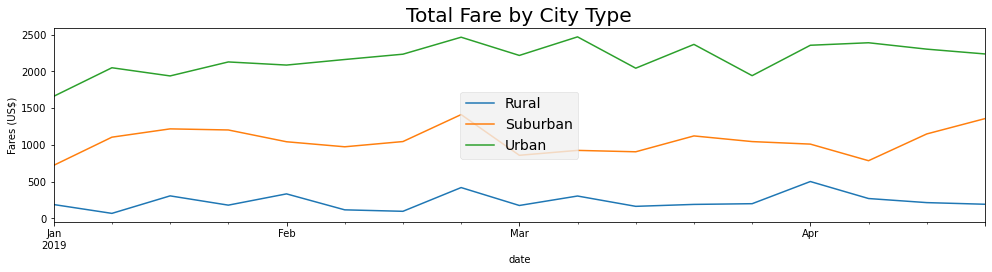

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
#fig = plt.figure(figsize=(20,8))
ax = pyber_citytype_by_week_df.plot(figsize=(14,4))
style.use('fivethirtyeight')
colors = ["yellow", "red", "blue"]
ax.set_ylabel("Fares (US$)")
ax.set_title("Total Fare by City Type")
ax.legend(loc="center")
plt.tight_layout()
plt.savefig("Analysis/FareByType.png")

plt.show()